# Análise Descritiva dos Reviews
### Março de 2016

In [1]:
import sys
sys.path.append("../pylinguistics/pylinguistics/")

import Pylinguistics as pl
import pandas as pd
import plotsfunc as pf
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline

reviews_features = pd.read_csv('reviews.csv.gz', compression='gzip')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Contagens Básicas

In [2]:
print('Reviews - Amostragem: %i' %len(reviews_features))
print('Reviews - Total de tokens no corpus: %i' % sum(reviews_features.word_count))

Reviews - Amostragem: 32226
Reviews - Total de tokens no corpus: 1922927


### 1.1 Categorias mais comentadas

In [3]:
df_agg = reviews_features[['word_count','category']].groupby(['category']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
category,,
TV,5748,63.752436
Celular e Smartphone,4985,72.055366
Camera Digital,2243,60.616139
Notebook,1406,60.017070
Ar Condicionado,1406,55.628734
Tablet,1306,62.266462
Geladeira / Refrigerador,1047,67.870105
Perfume,959,36.709072
Maquina de Lavar Roupas,945,76.206349


### 1.2 Tokens

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


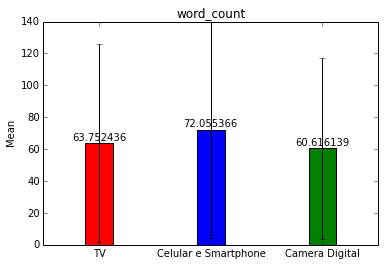

In [4]:
pf.comparaMedias(reviews_features,'word_count',['TV','Celular e Smartphone','Camera Digital'])

### 1.3 Sentenças

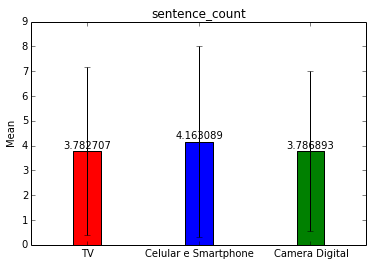

In [5]:
pf.comparaMedias(reviews_features,'sentence_count',['TV','Celular e Smartphone','Camera Digital'])

### 1.4 Tokens por sentença

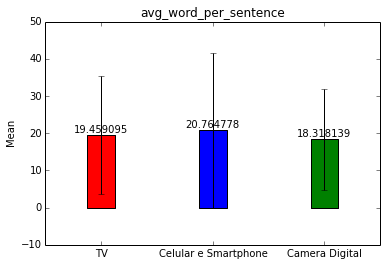

In [6]:
pf.comparaMedias(reviews_features,'avg_word_per_sentence',['TV','Celular e Smartphone','Camera Digital'])

### 1.5 Sílabas por token

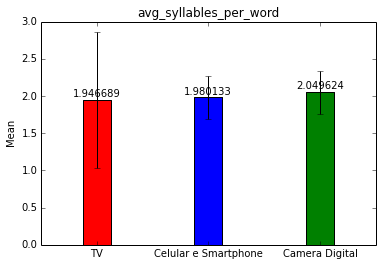

In [7]:
pf.comparaMedias(reviews_features,'avg_syllables_per_word',['TV','Celular e Smartphone','Camera Digital'])

In [8]:
mean_tv = reviews_features[reviews_features.category == 'TV'].groupby(['category']).agg(['mean'])
mean_cell = reviews_features[reviews_features.category == 'Celular e Smartphone'].groupby(['category']).agg(['mean'])
mean_camera = reviews_features[reviews_features.category == 'Camera Digital'].groupby(['category']).agg(['mean'])
most_cat = pd.concat([mean_tv, mean_cell, mean_camera])

### 1.6 Características Lógicas

In [12]:
most_cat[['LogicOperatorsIncidence','LogicIfIncidence','LogicAndIncidence','LogicNegationIncidence']]

,LogicOperatorsIncidence,LogicIfIncidence,LogicAndIncidence,LogicNegationIncidence
,mean,mean,mean,mean
category,,,,
TV,4.402237,0,0.005369,4.396401
Celular e Smartphone,4.738757,0,0.032127,4.702697
Camera Digital,4.243688,0,0.036854,4.206834


### 1.7 Características Sintáticas

In [13]:
most_cat[['pronIncidence','verbIncidence','adjectiveIncidence','advIncidence']]

,pronIncidence,verbIncidence,adjectiveIncidence,advIncidence
,mean,mean,mean,mean
category,,,,
TV,118.604096,170.640095,99.694399,80.492622
Celular e Smartphone,119.922896,177.725731,101.957168,82.657532
Camera Digital,127.402929,177.055740,110.523308,80.853214


### 1.8 Outras Características

In [14]:
most_cat[['LexicalDiversty','ContentDiversty','ConnectiveTemporalIncidence','ConnectiveCasualIncidence']]

,LexicalDiversty,ContentDiversty,ConnectiveTemporalIncidence,ConnectiveCasualIncidence
,mean,mean,mean,mean
category,,,,
TV,0.755529,0.827203,3.482776,3.886675
Celular e Smartphone,0.752233,0.830933,3.549805,4.094878
Camera Digital,0.757610,0.832260,6.034256,6.281362


## 2. Inteligibilidade

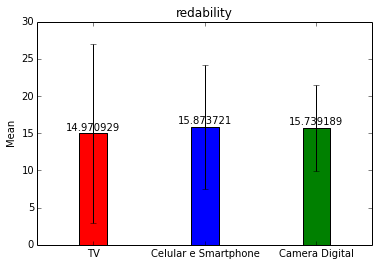

In [15]:
pf.comparaMedias(reviews_features,'redability',['TV','Celular e Smartphone','Camera Digital'])

## 3. Helpfulness

In [21]:
## adiciona coluna de helpfulness no corpus
def helpf(x): 
    try:
        return float ( float(x['thumbsup']) / (float(x['thumbsup']) + float(x['thumbsdown'])) )
    except:
        return 0
reviews_features['helpfulness'] = reviews_features.apply(helpf,axis=1)
## para usar no weka
## reviews_features.to_csv('reviews-help.csv',encoding='utf-8')

## 4. Correlações

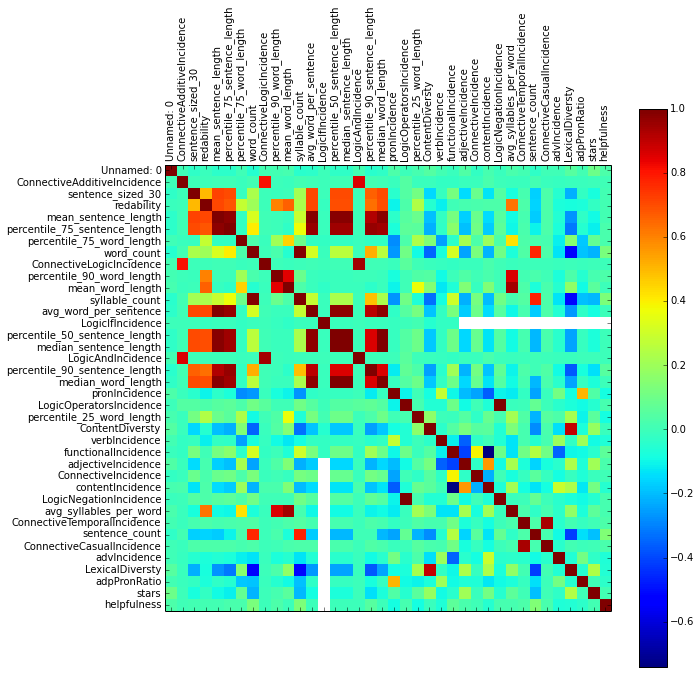

In [22]:
pf.plot_corr(reviews_features)

### 4.1 Correlação de Pearson sobre Helpfulness

In [41]:
np.corrcoef(reviews_features['sentence_count'],reviews_features['helpfulness'])

array([[ nan,  nan],
       [ nan,  nan]])

In [24]:
np.corrcoef(reviews_features['word_count'],reviews_features['helpfulness'])

array([[  1.,  nan],
       [ nan,  nan]])

In [25]:
np.corrcoef(reviews_features['syllable_count'],reviews_features['helpfulness'])

array([[  1.,  nan],
       [ nan,  nan]])

In [26]:
np.corrcoef(reviews_features['avg_syllables_per_word'],reviews_features['helpfulness'])

array([[ nan,  nan],
       [ nan,  nan]])

In [27]:
np.corrcoef(reviews_features['stars'],reviews_features['helpfulness'])

array([[ nan,  nan],
       [ nan,  nan]])

In [28]:
np.corrcoef(reviews_features['LogicIfIncidence'],reviews_features['helpfulness'])

array([[  1.,  nan],
       [ nan,  nan]])

In [29]:
np.corrcoef(reviews_features['ConnectiveIncidence'],reviews_features['helpfulness'])

array([[ nan,  nan],
       [ nan,  nan]])

In [30]:
np.corrcoef(reviews_features['ConnectiveTemporalIncidence'],reviews_features['helpfulness'])

array([[ nan,  nan],
       [ nan,  nan]])

In [31]:
np.corrcoef(reviews_features['avg_word_per_sentence'],reviews_features['helpfulness'])

array([[  1.,  nan],
       [ nan,  nan]])

### 4.2 Correlação de Spearman

In [32]:
spearmanr(reviews_features['sentence_count'],reviews_features['helpfulness'])

(0.10545961943935618, 2.3168441837306903e-80)

In [33]:
spearmanr(reviews_features['word_count'],reviews_features['helpfulness'])

(0.090230424292761971, 3.0799223910366605e-59)

In [34]:
spearmanr(reviews_features['syllable_count'],reviews_features['helpfulness'])

(0.098541967780139836, 2.3598082202166365e-70)

In [35]:
spearmanr(reviews_features['avg_syllables_per_word'],reviews_features['helpfulness'])

(0.047503960351871009, 1.435810914280146e-17)

In [36]:
spearmanr(reviews_features['stars'],reviews_features['helpfulness'])

(0.029224593366063773, 1.5442845280301776e-07)

### 4.3 Correlações Combinadas

In [37]:
## função para combinar colunas
def sentPword(x): 
    try:
        return float(x['sentence_count']) + float(x['word_count'])
    except:
        return 0
reviews_features['sent_word_count'] = reviews_features.apply(sentPword,axis=1)

In [42]:
spearmanr(reviews_features['avg_word_per_sentence'],reviews_features['helpfulness'])

(0.0029976547849821771, 0.59050291798780197)

## 5. Análises no Weka

### 5.1 Ranker + ReliefAttributeEval , target helpfulness

In [40]:
%%html
<style> table {float:left} </style>

score | attribute
 :- |-------------:
0.5264773 | thumbsdown
0.4941516 | thumbsup
0.0000933 | ConnectiveAdditiveIncidence
0.0000694 | LogicOrIncidence
0  | LogicIfIncidence
-0.0000695 | LogicAndIncidence
-0.0000768 | ConnectiveLogicIncidence
-0.0001056 | percentile_90_word_length
-0.0001667 | mean_word_length
-0.0001873 | avg_syllables_per_word
-0.0003181 | redability
-0.0009159 | avg_word_per_sentence
-0.0010063 |  mean_sentence_length
-0.0010762 | percentile_75_sentence_length
-0.0010764 | median_sentence_length
-0.0010764 | median_word_length
-0.0010764 | percentile_50_sentence_length
-0.0011477 | percentile_90_sentence_length
-0.0013115 | ConnectiveCasualIncidence
-0.0015525 | ConnectiveTemporalIncidence
-0.0020459 | advIncidence
-0.0021855 | verbIncidence
-0.0022928 | LogicNegationIncidence
-0.0023062 | LogicOperatorsIncidence
-0.0027714 | adjectiveIncidence
-0.0028178 | percentile_75_word_length
-0.0030587 | syllable_count
-0.0030935 | word_count
-0.0032031 | contentIncidence
-0.0032986 | pronIncidence
-0.0033796 | adpPronRatio
-0.0036235 | percentile_50_word_length
-0.0037293 | functionalIncidence
-0.0041076 | percentile_25_word_length
-0.0044149 | stars
-0.0047208 | sentence_count
-0.0051737 | ContentDiversty
-0.0054476 | ConnectiveIncidence
-0.0055495 | LexicalDiversty
-0.0110385 | sentence_sized_30
-0.12254 | nounIncidence
-0.142444 | percentile_25_sentence_length